In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [8]:
# Наща задача - научиться предсказывать значения переменной Y на основе переменных X_1 и X_2
# для начала садим дерево
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
X = data[['X_1', 'X_2']] # сохраним все фичи в переменную Х
y = data.Y # целевая переменная

In [11]:
clf.fit(X, y) # обучим дерево решений

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Самый простой способ посмотреть чему научилось дерево - визуализировать его

[Text(167.4, 181.2, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

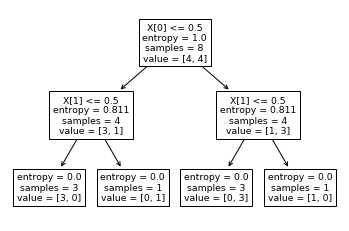

In [12]:
# альтернативный вариант визуализации
tree.plot_tree(clf.fit(X, y))

[Text(167.4, 181.2, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(83.7, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(251.10000000000002, 108.72, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

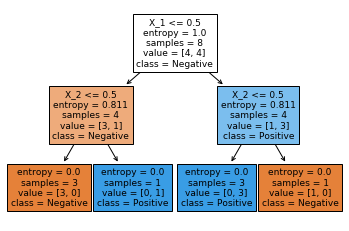

In [14]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)

In [ ]:
# Так выглядит обученное дерево решений после 'clf.fit(X, y)'

In [ ]:
# нам нужно задавать только те вопросы, которые максимально приближают нас к решению
# Вопрос 'А правда ли, что X_1 < 0.5?' Позволяет нам снизить уровень неопределенности

In [ ]:
# X_1 очень сильно коррелирует с Y

In [ ]:
# Энтропия - уровень неопределенности наших данных. Тем выше. чем хуже у нас получается разделять классы
# 1 - максимальная степень неопределенности наших данных

In [15]:
cats_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')
cats_data

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.991\nsamples = 9\nvalue = [5, 4]')]

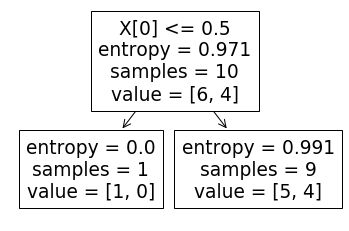

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
X = cats_data['Шерстист'].to_frame()
y = cats_data['Вид']
tree.plot_tree(clf.fit(X, y))
# Энтропия при разделении по фиче Шерстист в группах, где Шерстист равно 0 и 1 соответственно, составляет:

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

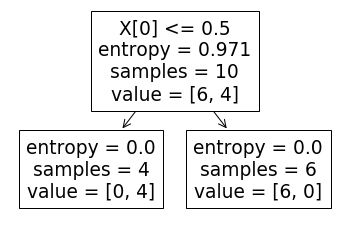

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
X = cats_data['Лазает по деревьям'].to_frame()
y = cats_data['Вид']
tree.plot_tree(clf.fit(X, y))